Importing Libraries

In [1]:
#Import necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Load Data from Dataset

df = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


Data Cleaning

In [4]:
#Check null value
df.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [5]:
#Drop the missing values
df = df.dropna(subset=['AverageTemperature','AverageTemperatureUncertainty'])

In [6]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

Data Processing


In [7]:
#Changing Data type of dt column into datetime
df['dt'] = pd.to_datetime(df['dt'])


In [8]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [9]:
#Extracting year and month from the data

df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

In [10]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,11
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744,4
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744,5
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744,6
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744,7


In [11]:
df.City.unique()

array(['Århus', 'Çorlu', 'Çorum', ..., 'Zurich', 'Zuwarah', 'Zwolle'],
      dtype=object)

In [12]:
#Taking Year form 1900 to 2013
latest_df = df.loc['1900':'2013']
latest_df[['Country','AverageTemperature']].groupby(['Country']).mean().sort_values('AverageTemperature')

,AverageTemperature
Country,
Latvia,5.499115
United Kingdom,8.586791
Hungary,9.074897
China,9.088690
Russia,10.496743
United States,11.056345
Turkmenistan,13.399442
Turkey,15.045693
Iran,16.198782


In [13]:
#Changing data type of latitude and longitude into float

lat = latest_df['Latitude']
lon = latest_df['Longitude']

def convert_lat(lat):
    return float(lat[:-1]) * (1 if lat[-1] == 'N' else -1)

def convert_lon(lon):
    return float(lon[:-1]) * (1 if lon[-1] == 'E' else -1)

latest_df['Latitude'] = latest_df['Latitude'].apply(convert_lat)
latest_df['Longitude'] = latest_df['Longitude'].apply(convert_lon)

C:\Users\gaura\AppData\Local\Temp\ipykernel_18408\1571196252.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['Latitude'] = latest_df['Latitude'].apply(convert_lat)
C:\Users\gaura\AppData\Local\Temp\ipykernel_18408\1571196252.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_df['Longitude'] = latest_df['Longitude'].apply(convert_lon)


In [14]:
#Correlation between Latitude and Average Temperature
corr_lat = latest_df[['Latitude','AverageTemperature']].corr()
corr_lat

,Latitude,AverageTemperature
Latitude,1.000000,-0.527445
AverageTemperature,-0.527445,1.000000


Data Visualization

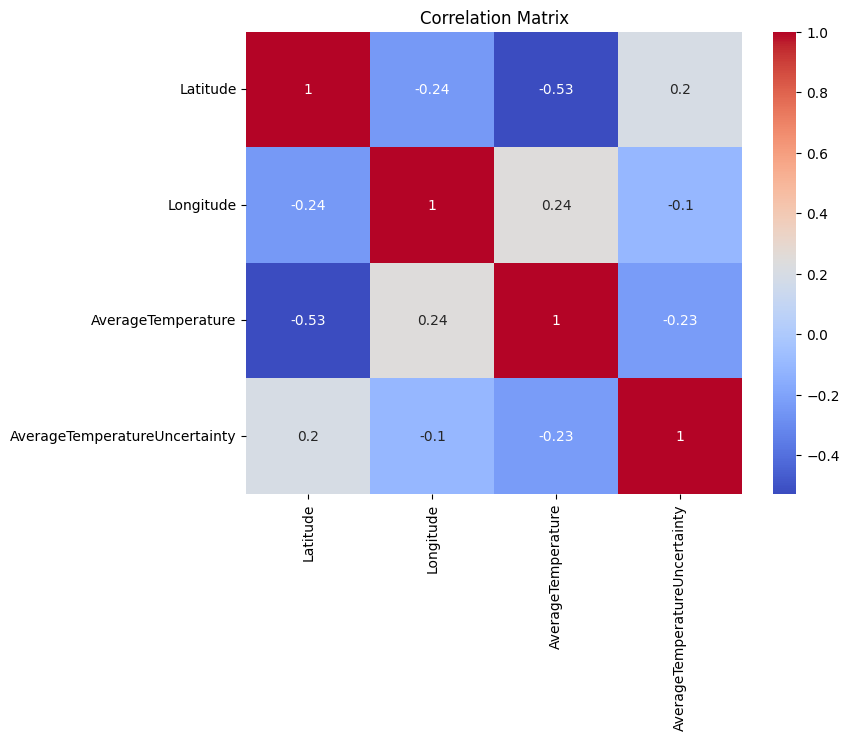

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(latest_df[['Latitude', 'Longitude', 'AverageTemperature', 'AverageTemperatureUncertainty']].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

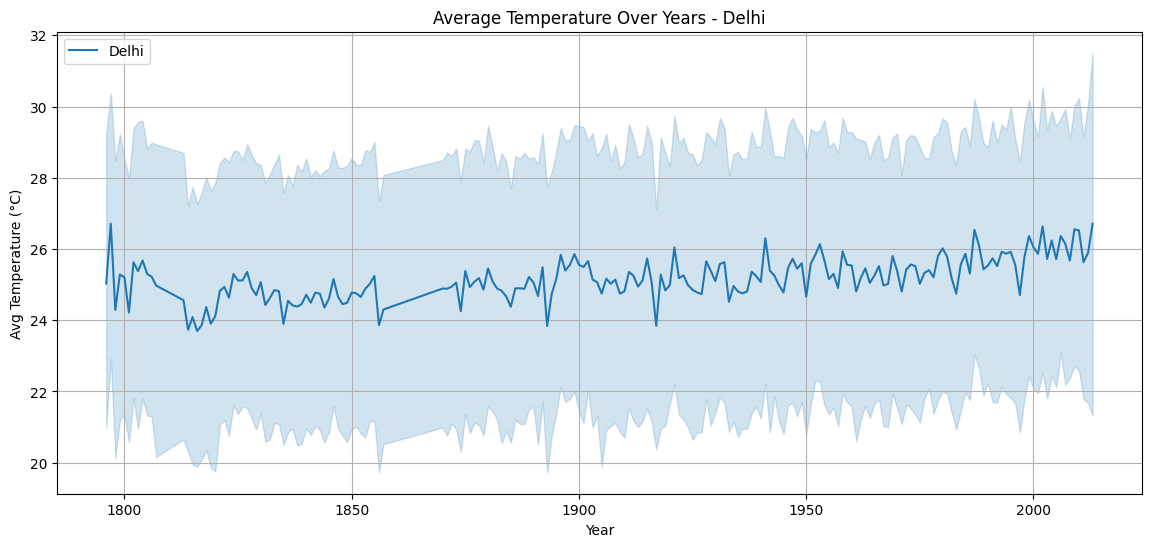

In [16]:
#Time Series Line plot
plt.figure(figsize=(14, 6))
city_data = latest_df[latest_df['City'] == 'Delhi']  # Change city name as needed
sns.lineplot(data=city_data, x='Year', y='AverageTemperature', label='Delhi')
plt.title('Average Temperature Over Years - Delhi')
plt.xlabel('Year')
plt.ylabel('Avg Temperature (°C)')
plt.grid(True)
plt.show()

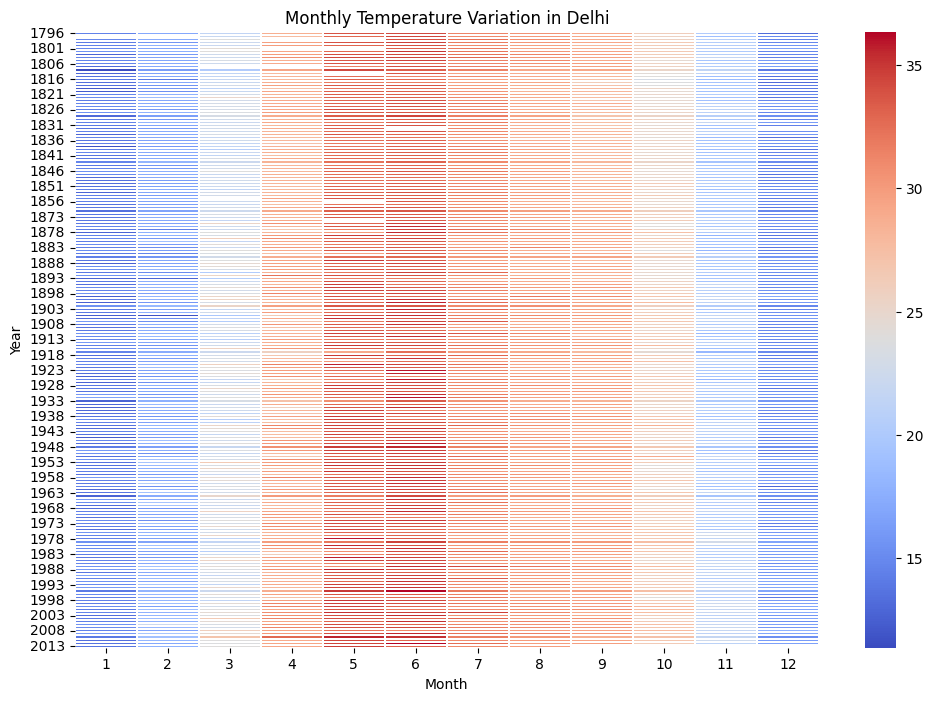

In [17]:
pivot_table = latest_df[latest_df['City'] == 'Delhi'].pivot_table(
    index='Year', columns='Month', values='AverageTemperature'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', linecolor='white', linewidths=0.1)
plt.title('Monthly Temperature Variation in Delhi')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

C:\Users\gaura\AppData\Local\Temp\ipykernel_18408\3402553399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset, x='Country', y='AverageTemperature', palette='Set2')


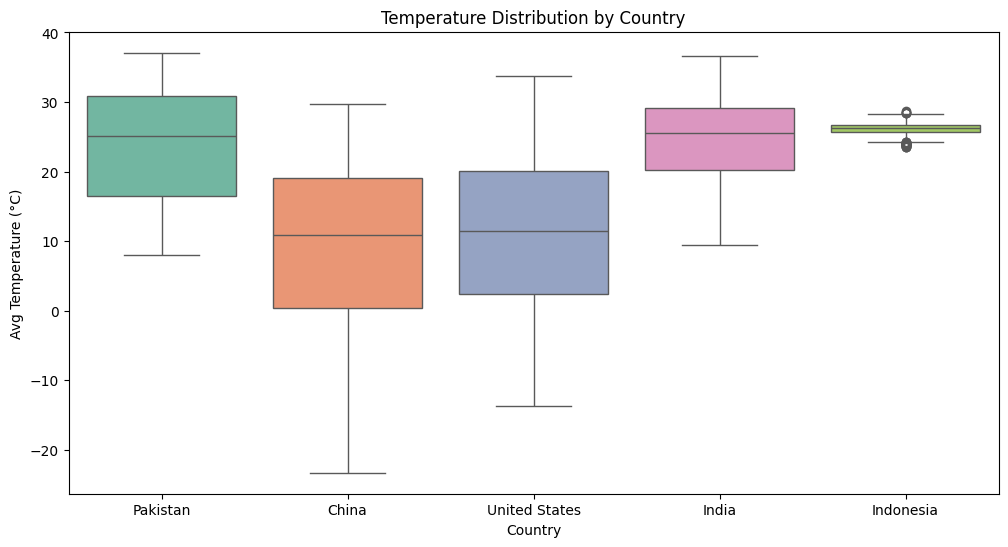

In [18]:
top_countries = latest_df['Country'].value_counts().head(5).index  # Top 5 by data volume
subset = latest_df[latest_df['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=subset, x='Country', y='AverageTemperature', palette='Set2')
plt.title('Temperature Distribution by Country')
plt.ylabel('Avg Temperature (°C)')
plt.show()

In [19]:
avg_temp = latest_df.groupby(['City', 'Country', 'Latitude', 'Longitude'], as_index=False).mean()

fig = px.scatter_geo(avg_temp,
                     lat='Latitude',
                     lon='Longitude',
                     color='AverageTemperature',
                     hover_name='City',
                     size='AverageTemperature',
                     projection='natural earth',
                     color_continuous_scale='thermal',
                     title='Average Temperature by City (1900–2013)')
fig.show()
